# 3D Point Cloud class
### The 3D Point Cloud class extracts and utilizes the [Point](Point%20Class.ipynb) Class

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from geobipy import PointCloud3D
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
# Initialize a 3D point cloud with N elements
N=10
# Instantiation pointcloud with an integer size N
PC3D=PointCloud3D(N)

## Create a quick test example using random points
$z=x(1-x)cos(4\pi x)sin(4\pi y^{2})^{2}$

In [3]:
PC3D.maketest(8000)

### Write a summary of the contents of the point cloud

In [4]:
PC3D.summary()

3D Point Cloud: 
Number of Points: : 8000 
 Name:  Easting
    Units: m
    Shape: (8000,)
   Values: [-0.18344585 -0.55846013 -0.64699921 ... -0.6097845  -0.38385824
  0.88759667]
No attached prior 
No attached proposal 
 Name:  Northing
    Units: m
    Shape: (8000,)
   Values: [-0.4641285  -0.51358459  0.15356232 ... -0.51109456  0.43663904
  0.13259816]
No attached prior 
No attached proposal 
 Name:  Height
    Units: m
    Shape: (8000,)
   Values: [ 0.18087742 -0.15880261  0.22027714 ... -0.33168555 -0.1858061
 -0.03787811]
No attached prior 
No attached proposal 



### Get a single location from the point as a 3x1 vector

In [5]:
Point=PC3D.getPoint(50)
# Print the point to the screen
print(Point)

Point(0.0041306090689390285, 0.19936002895779925, 0.002410983550774464)


### Plot the locations with Height as colour

<IPython.core.display.Javascript object>


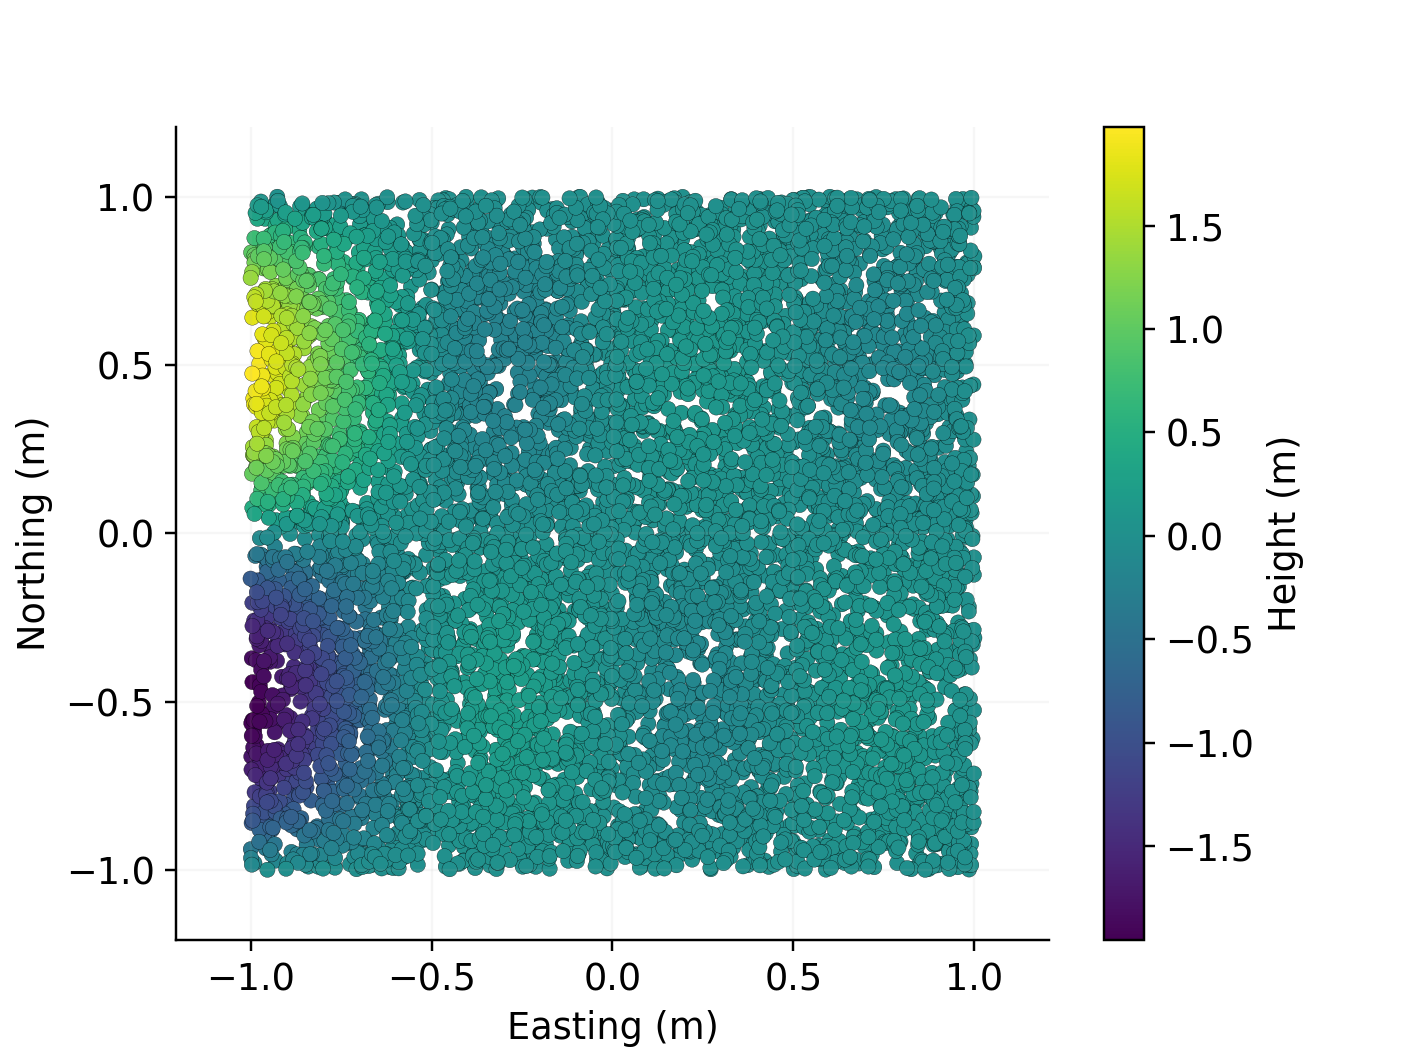

In [6]:
plt.figure()
PC3D.scatter2D(edgecolor='k')

### Plotting routines take matplotlib arguments for customization
#### For example, plotting the size of the points according to the absolute value of height

<IPython.core.display.Javascript object>


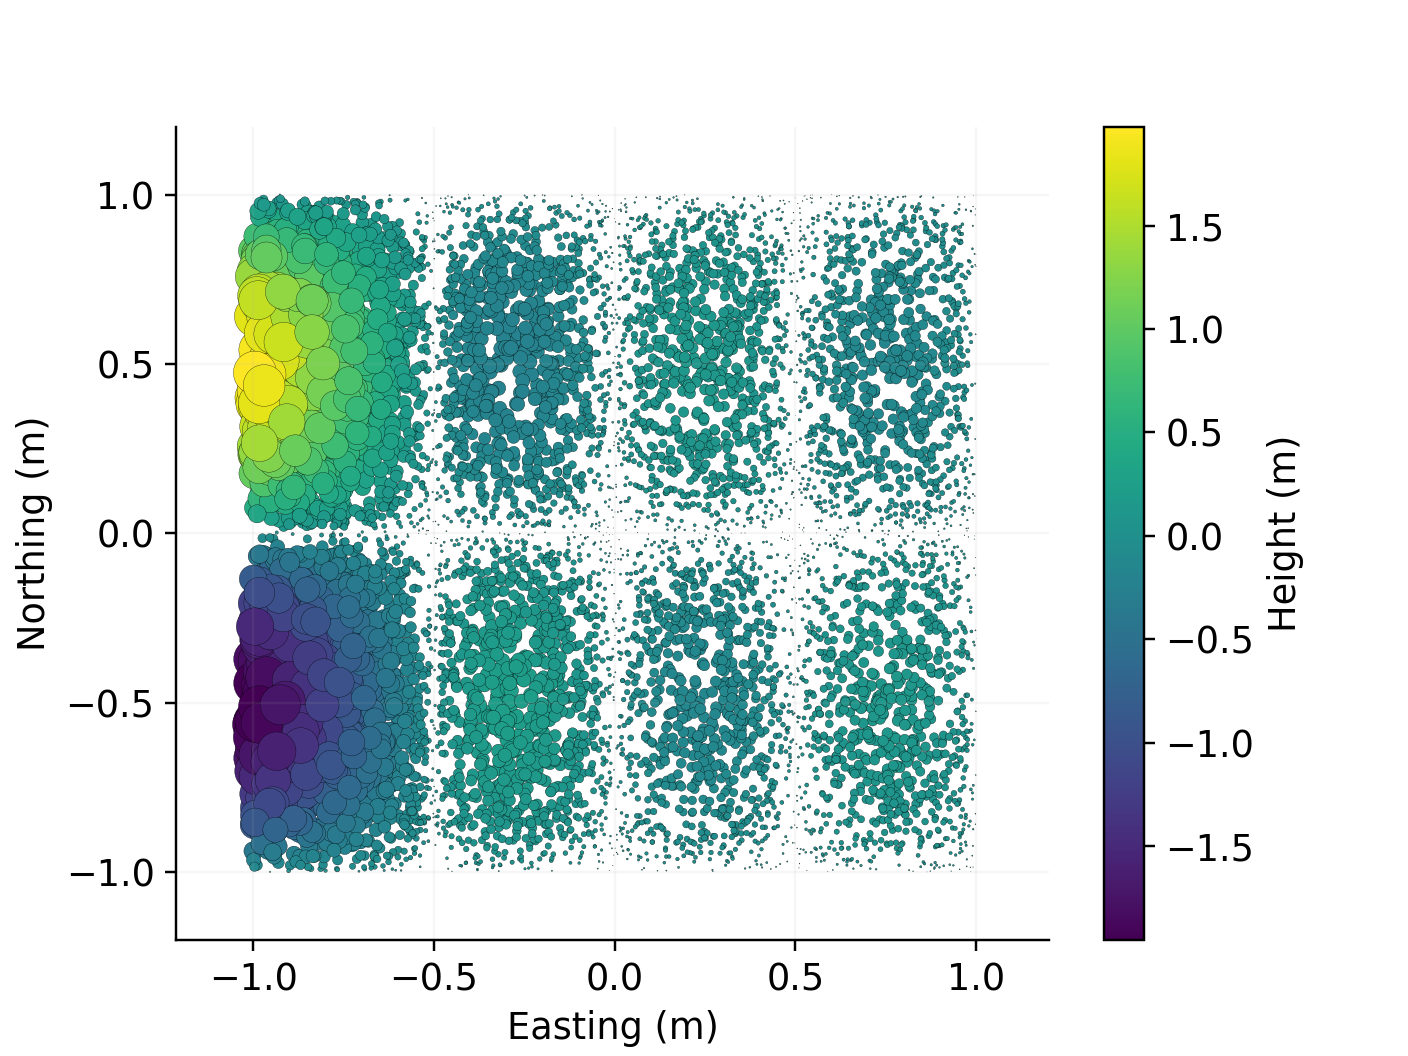

In [7]:
plt.figure()
ax = PC3D.scatter2D(s=100*np.abs(PC3D.z),edgecolor='k')

### Grid the points using a triangulated CloughTocher interpolation

<IPython.core.display.Javascript object>


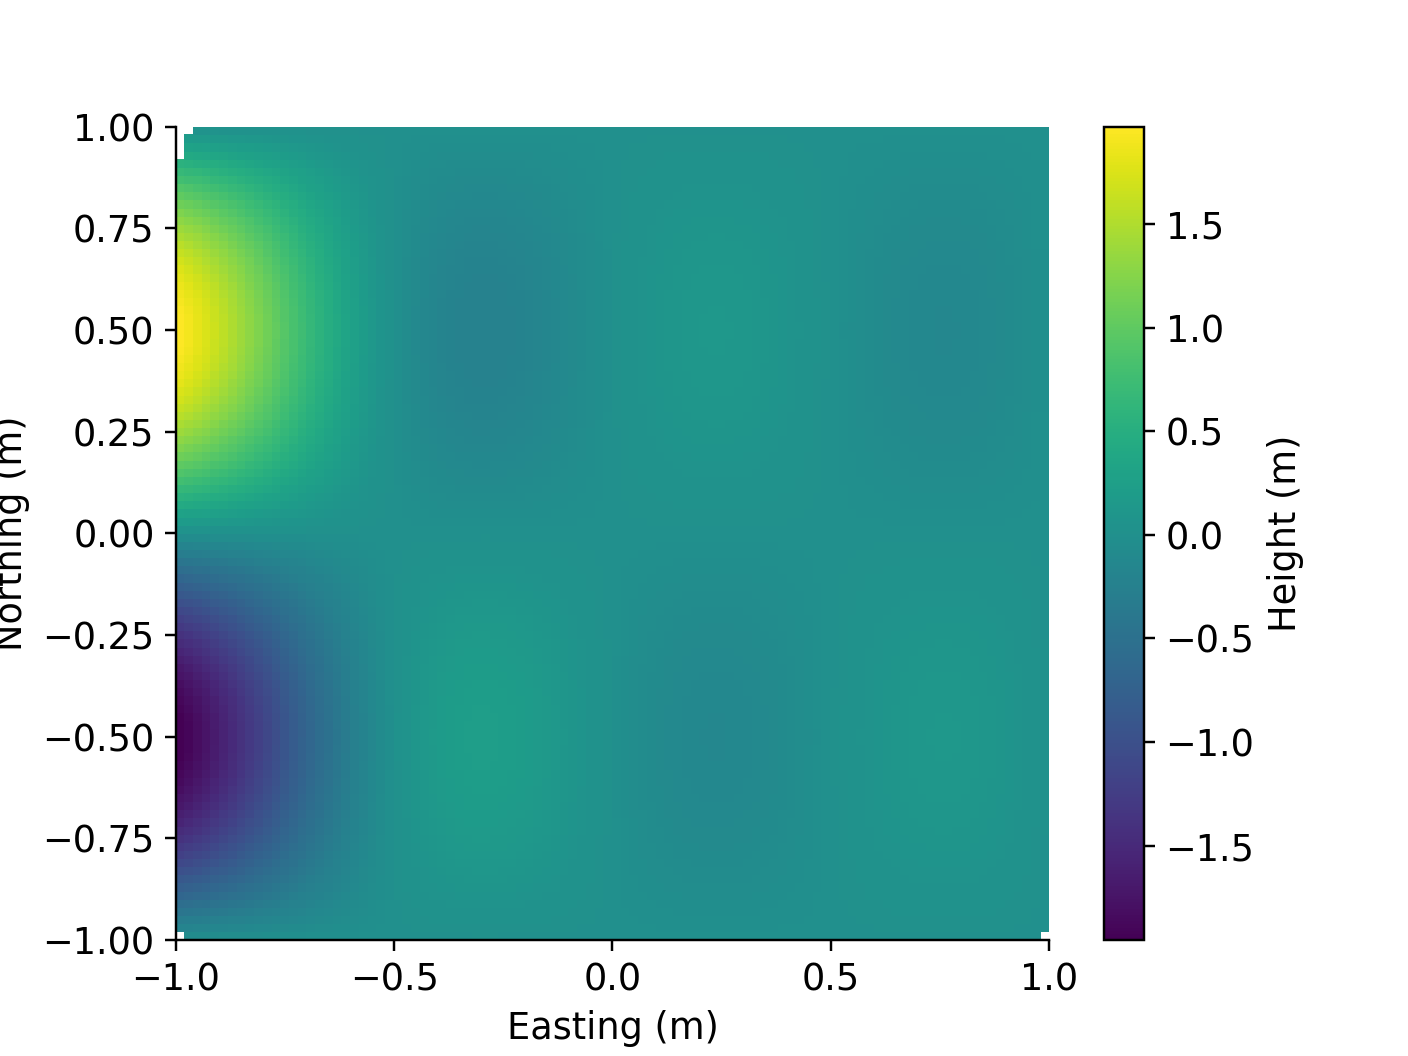

In [8]:
plt.figure()
PC3D.mapPlot(method='ct')

### We can perform spatial searches on the 3D point cloud

In [9]:
PC3D.setKdTree(nDims=2)
p = PC3D.nearest((0.0,0.0), k=200, p=2, radius=0.3)
print(p)

(array([0.00601943, 0.01558676, 0.0157635 , ..., 0.17818612, 0.17821601,
       0.17893628]), array([5876, 1415, 4393, ..., 3652, 2347, 1823]))


#### .nearest returns the distances and indices into the point cloud of the nearest points.
We can then obtain those points as another point cloud

<IPython.core.display.Javascript object>


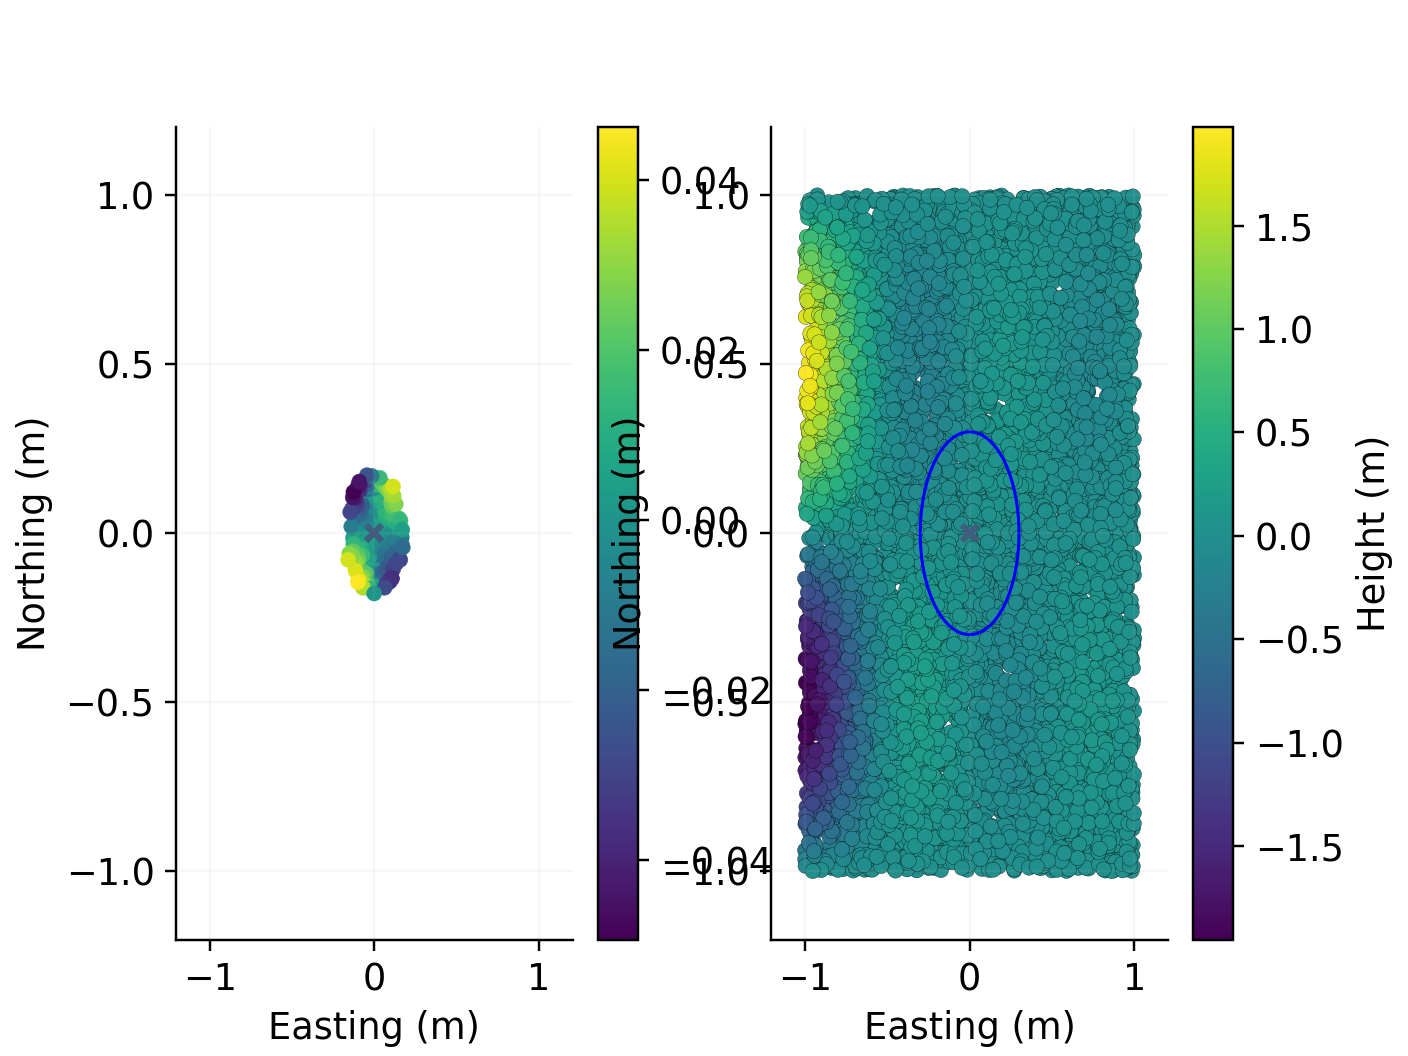

In [10]:
pNear = PC3D[p[1]]
plt.figure()
ax1 = plt.subplot(1,2,1)
pNear.scatter2D()
plt.plot(0.0, 0.0, 'x')
plt.subplot(1,2,2, sharex=ax1, sharey=ax1)
ax = PC3D.scatter2D(edgecolor='k')
searchRadius = plt.Circle((0.0, 0.0), 0.3, color='b', fill=False)
ax.add_artist(searchRadius)
plt.plot(0.0, 0.0, 'x')

### Read in the xyz co-ordinates in columns 2,3,4 from a file. Skip 1 header line.

In [11]:
PC3D.read(fileName=join('supplementary','data','Resolve1.txt'), nHeaderLines=1, columnIndices=[2,3,4])

<IPython.core.display.Javascript object>


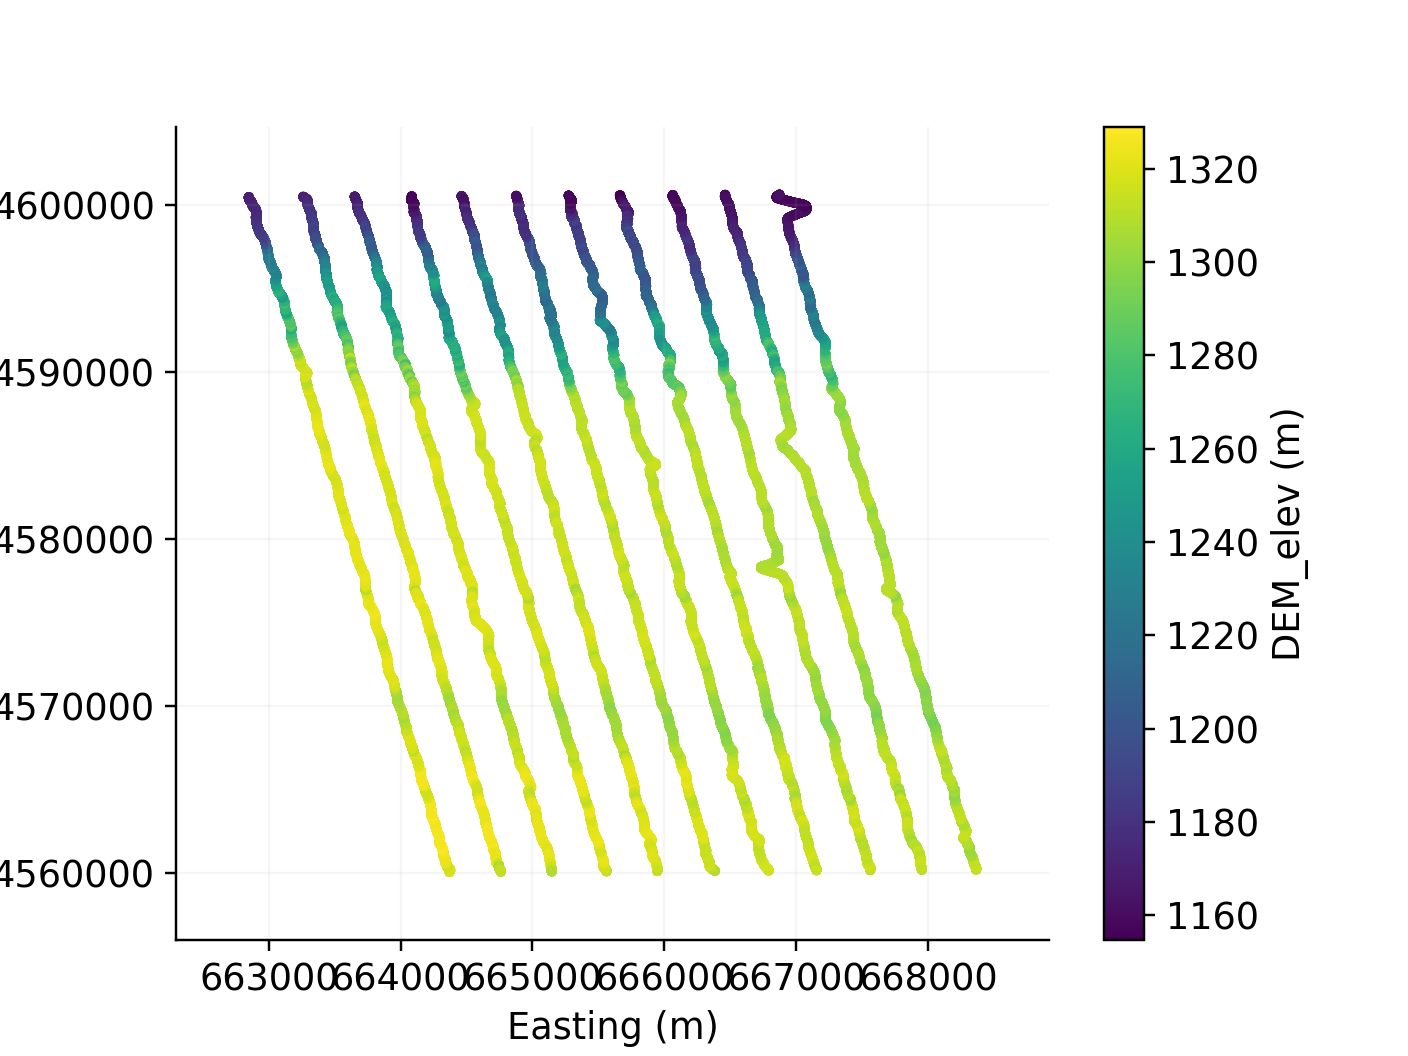

In [12]:
plt.figure()
f = PC3D.scatter2D(s=10)

### Export the 3D Pointcloud to a VTK file.

In this case, I pass the height as point data so that the points are coloured when opened in Paraview (or other software)

In [13]:
PC3D.toVTK('testPoints', format='binary')